In [ ]:
!mkdir -p /root/.kaggle

In [ ]:
import shutil
shutil.move('kaggle.json', '/root/.kaggle')

'/root/.kaggle/kaggle.json'

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
License(s): CC0-1.0


In [ ]:
!unzip /content/diabetes-health-indicators-dataset.zip

Archive:  /content/diabetes-health-indicators-dataset.zip
  inflating: diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_health_indicators_BRFSS2015.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


<Axes: >

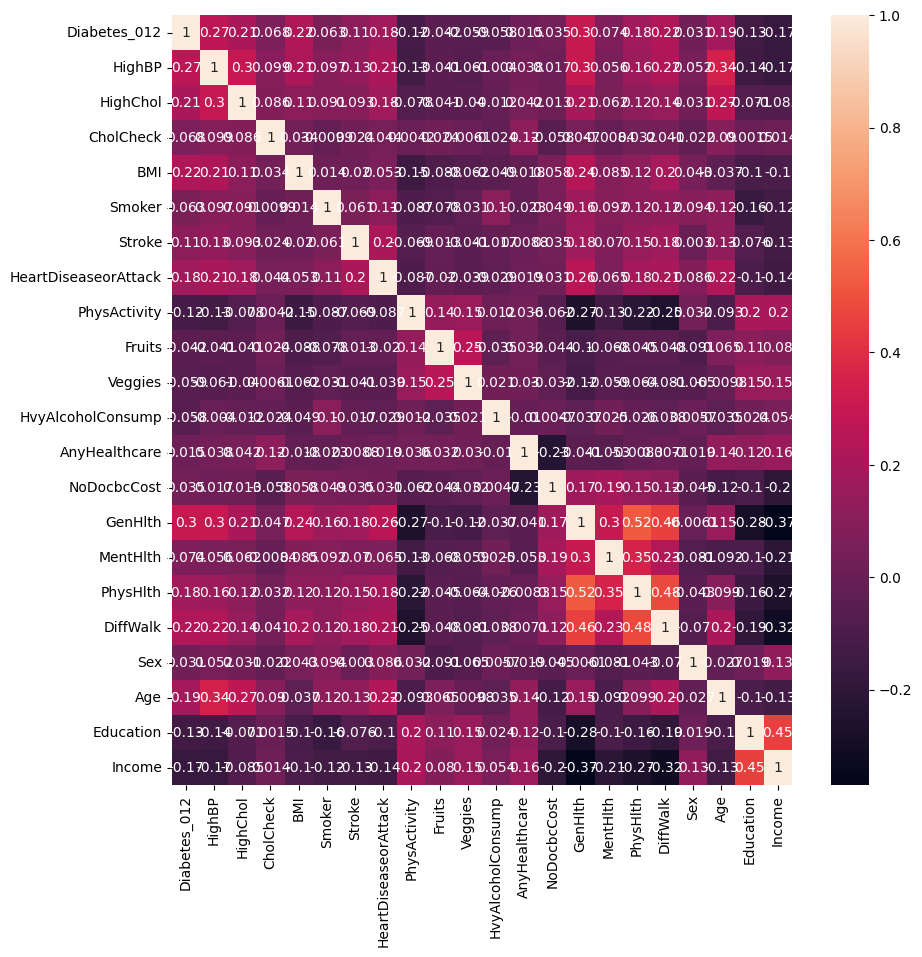

In [ ]:
df_corr=df.corr(numeric_only=True)
df_corr

plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [ ]:
duplicates = df.duplicated().sum()
print(duplicates)
if duplicates > 0:
  print(df[df.duplicated(keep=False)].head(10))

23899
     Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
5             0.0     1.0       1.0        1.0  25.0     1.0     0.0   
25            0.0     0.0       0.0        1.0  32.0     0.0     0.0   
29            0.0     0.0       1.0        1.0  31.0     1.0     0.0   
44            0.0     0.0       1.0        1.0  31.0     1.0     0.0   
52            2.0     1.0       1.0        1.0  27.0     1.0     0.0   
53            0.0     0.0       0.0        1.0  31.0     0.0     0.0   
57            0.0     0.0       1.0        1.0  24.0     1.0     0.0   
70            0.0     1.0       1.0        1.0  27.0     1.0     0.0   
80            0.0     1.0       0.0        1.0  28.0     0.0     0.0   
113           0.0     1.0       0.0        1.0  27.0     0.0     0.0   

     HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
5                     0.0           1.0     1.0  ...            1.0   
25                    0.0           1.0     1.0  ...       

In [ ]:
duplicate_count = df.duplicated().sum()
print(f'Number of duplicates rows: {duplicate_count}')

df.drop_duplicates(inplace = True)
print(f'Number of rows after removing duplicates: {len(df)}')

Number of duplicates rows: 23899
Number of rows after removing duplicates: 229781


In [ ]:
df = df.loc[:,df.apply(pd.Series.nunique) !=1]
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


<ipython-input-15-ec873c1df2b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-15-ec873c1df2b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-15-ec873c1df2b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-15-ec873c1df2b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

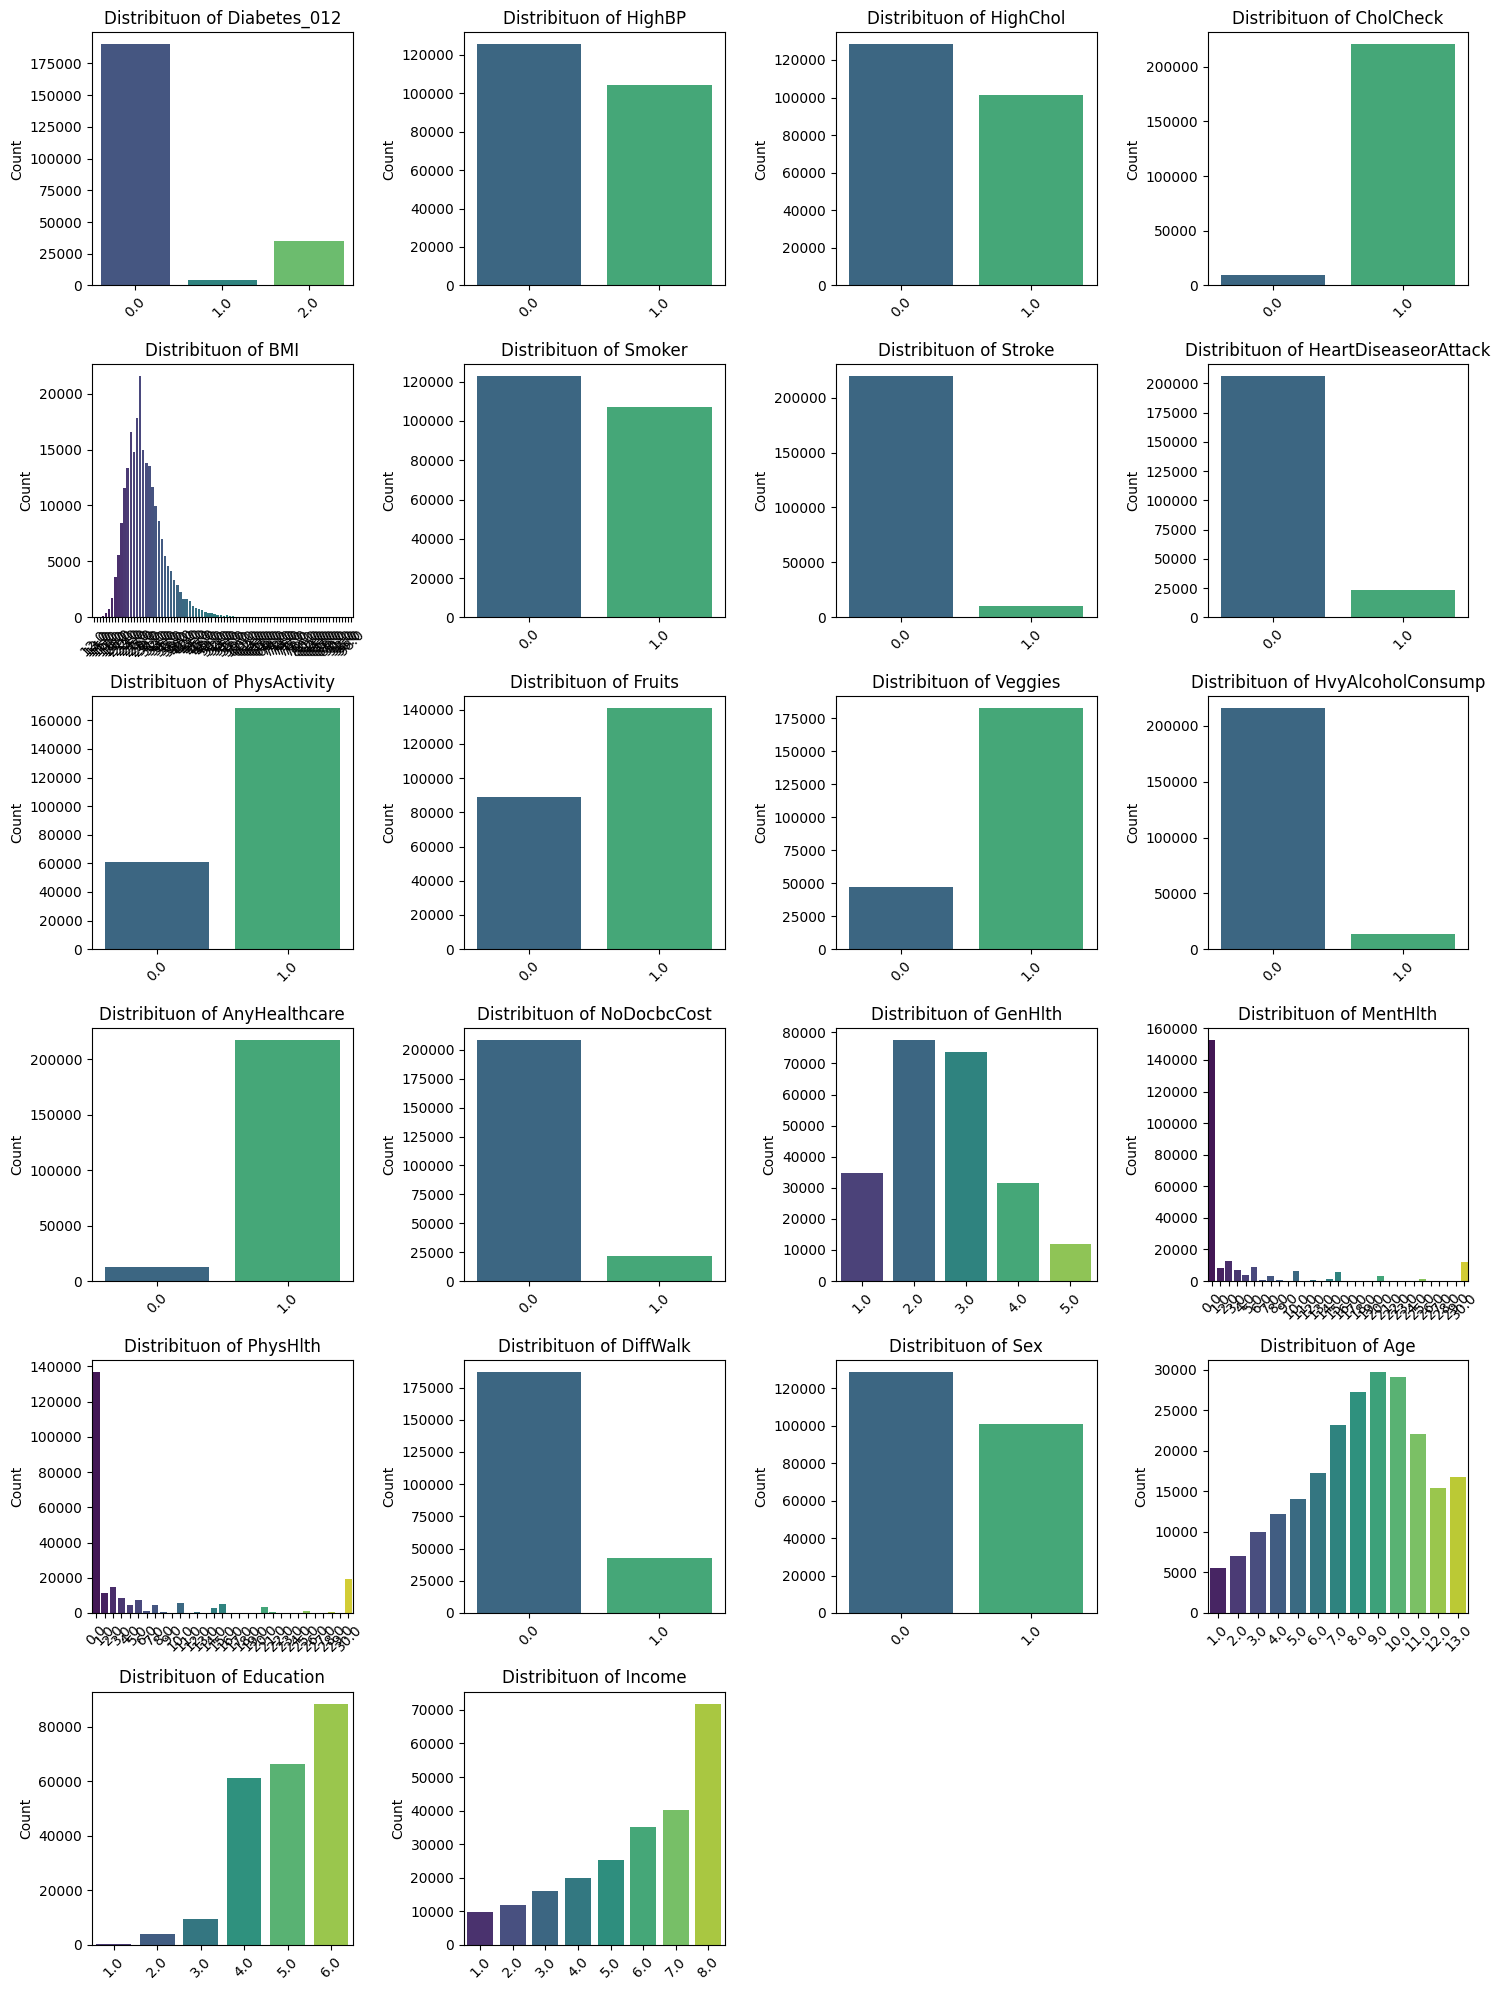

In [ ]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(df.columns):
  plt.subplot(6, 4, i + 1)
  sns.countplot(data=df, x=col, palette='viridis')
  plt.title(f'Distribituon of {col}')
  plt.xlabel('')
  plt.ylabel('Count')
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print('Categorical features:', categorical_features)

Categorical features: Index([], dtype='object')


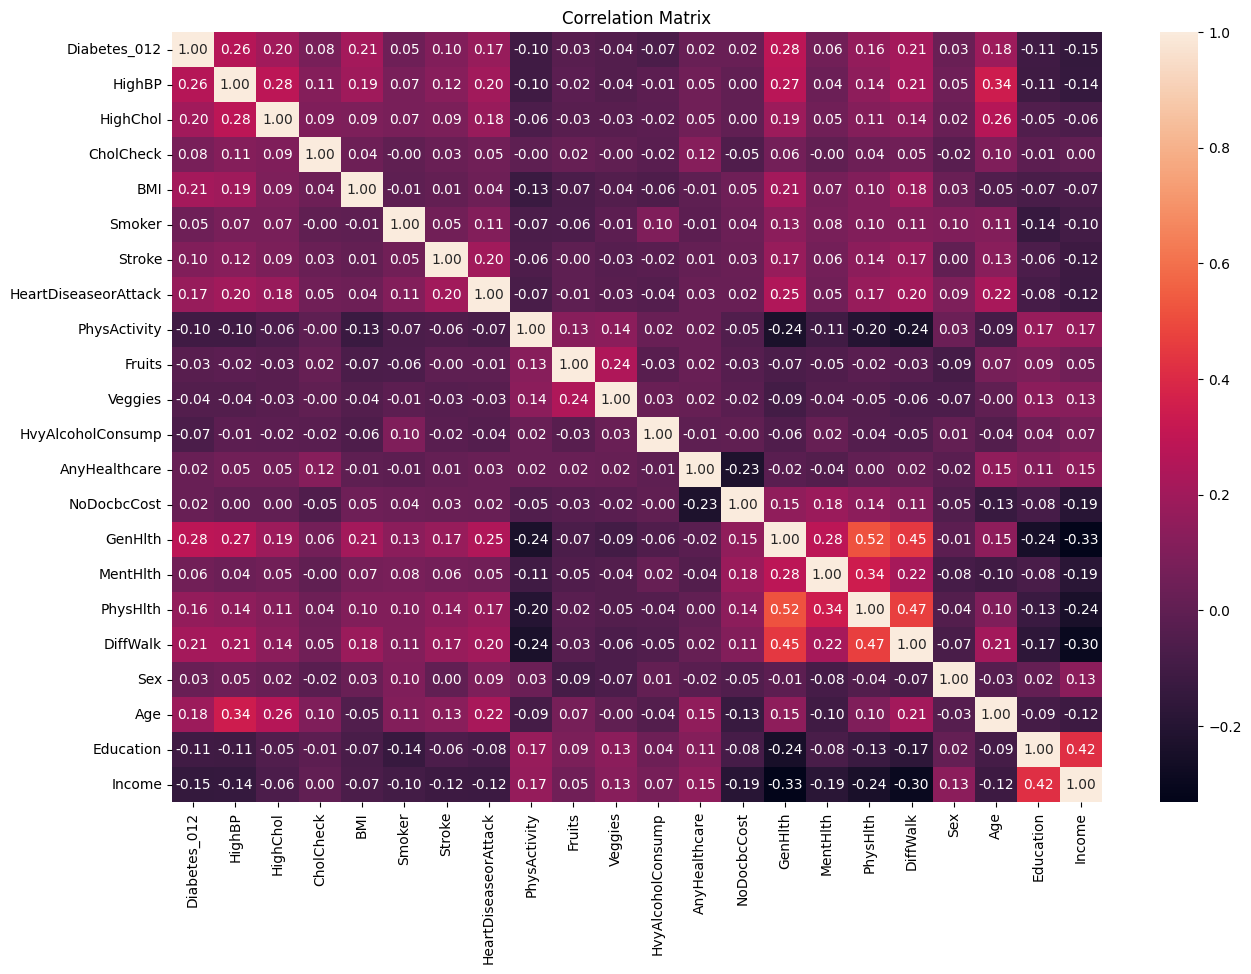

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
print('Decision Tree Performance:')
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Precision:', precision_score(y_test,y_pred_dt, average='micro'))
print('Recall:', recall_score(y_test, y_pred_dt, average='micro'))
print('n\Classification Report:')
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.7430262413507985
Precision: 0.7430262413507985
Recall: 0.7430262413507985
n\Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85     19036
         1.0       0.03      0.04      0.03       463
         2.0       0.29      0.31      0.30      3480

    accuracy                           0.74     22979
   macro avg       0.39      0.40      0.39     22979
weighted avg       0.76      0.74      0.75     22979



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid2 = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}


grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid2, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score:', grid_search.best_score_)

best_dt_model = grid_search.best_estimator_

y_pred_best_dt = best_dt_model.predict(X_test)

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation score: 0.8326998771772033


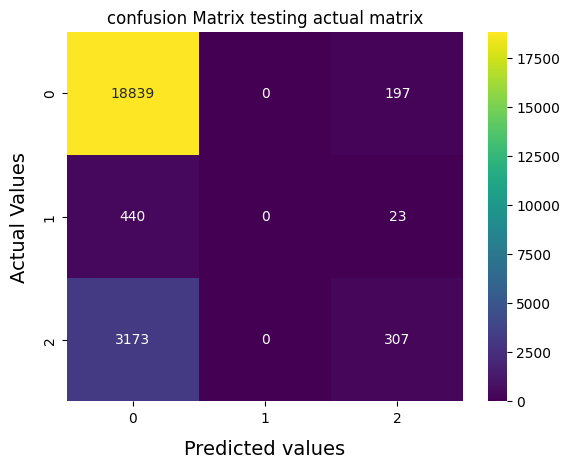

In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred_best_dt),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted values',fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('confusion Matrix testing actual matrix')
plt.show()